## SQL-запросы к данным о венчурных фондах и инвестициях в компании-стартапы

### Цель проекта

В соответствии с заданиями написать SQL-запросы к БД

### Данные

Предоставлена база данных, сформированная на основе датасета Startup Investments (https://www.kaggle.com/justinas/startup-investments).

ER-диаграмма БД.

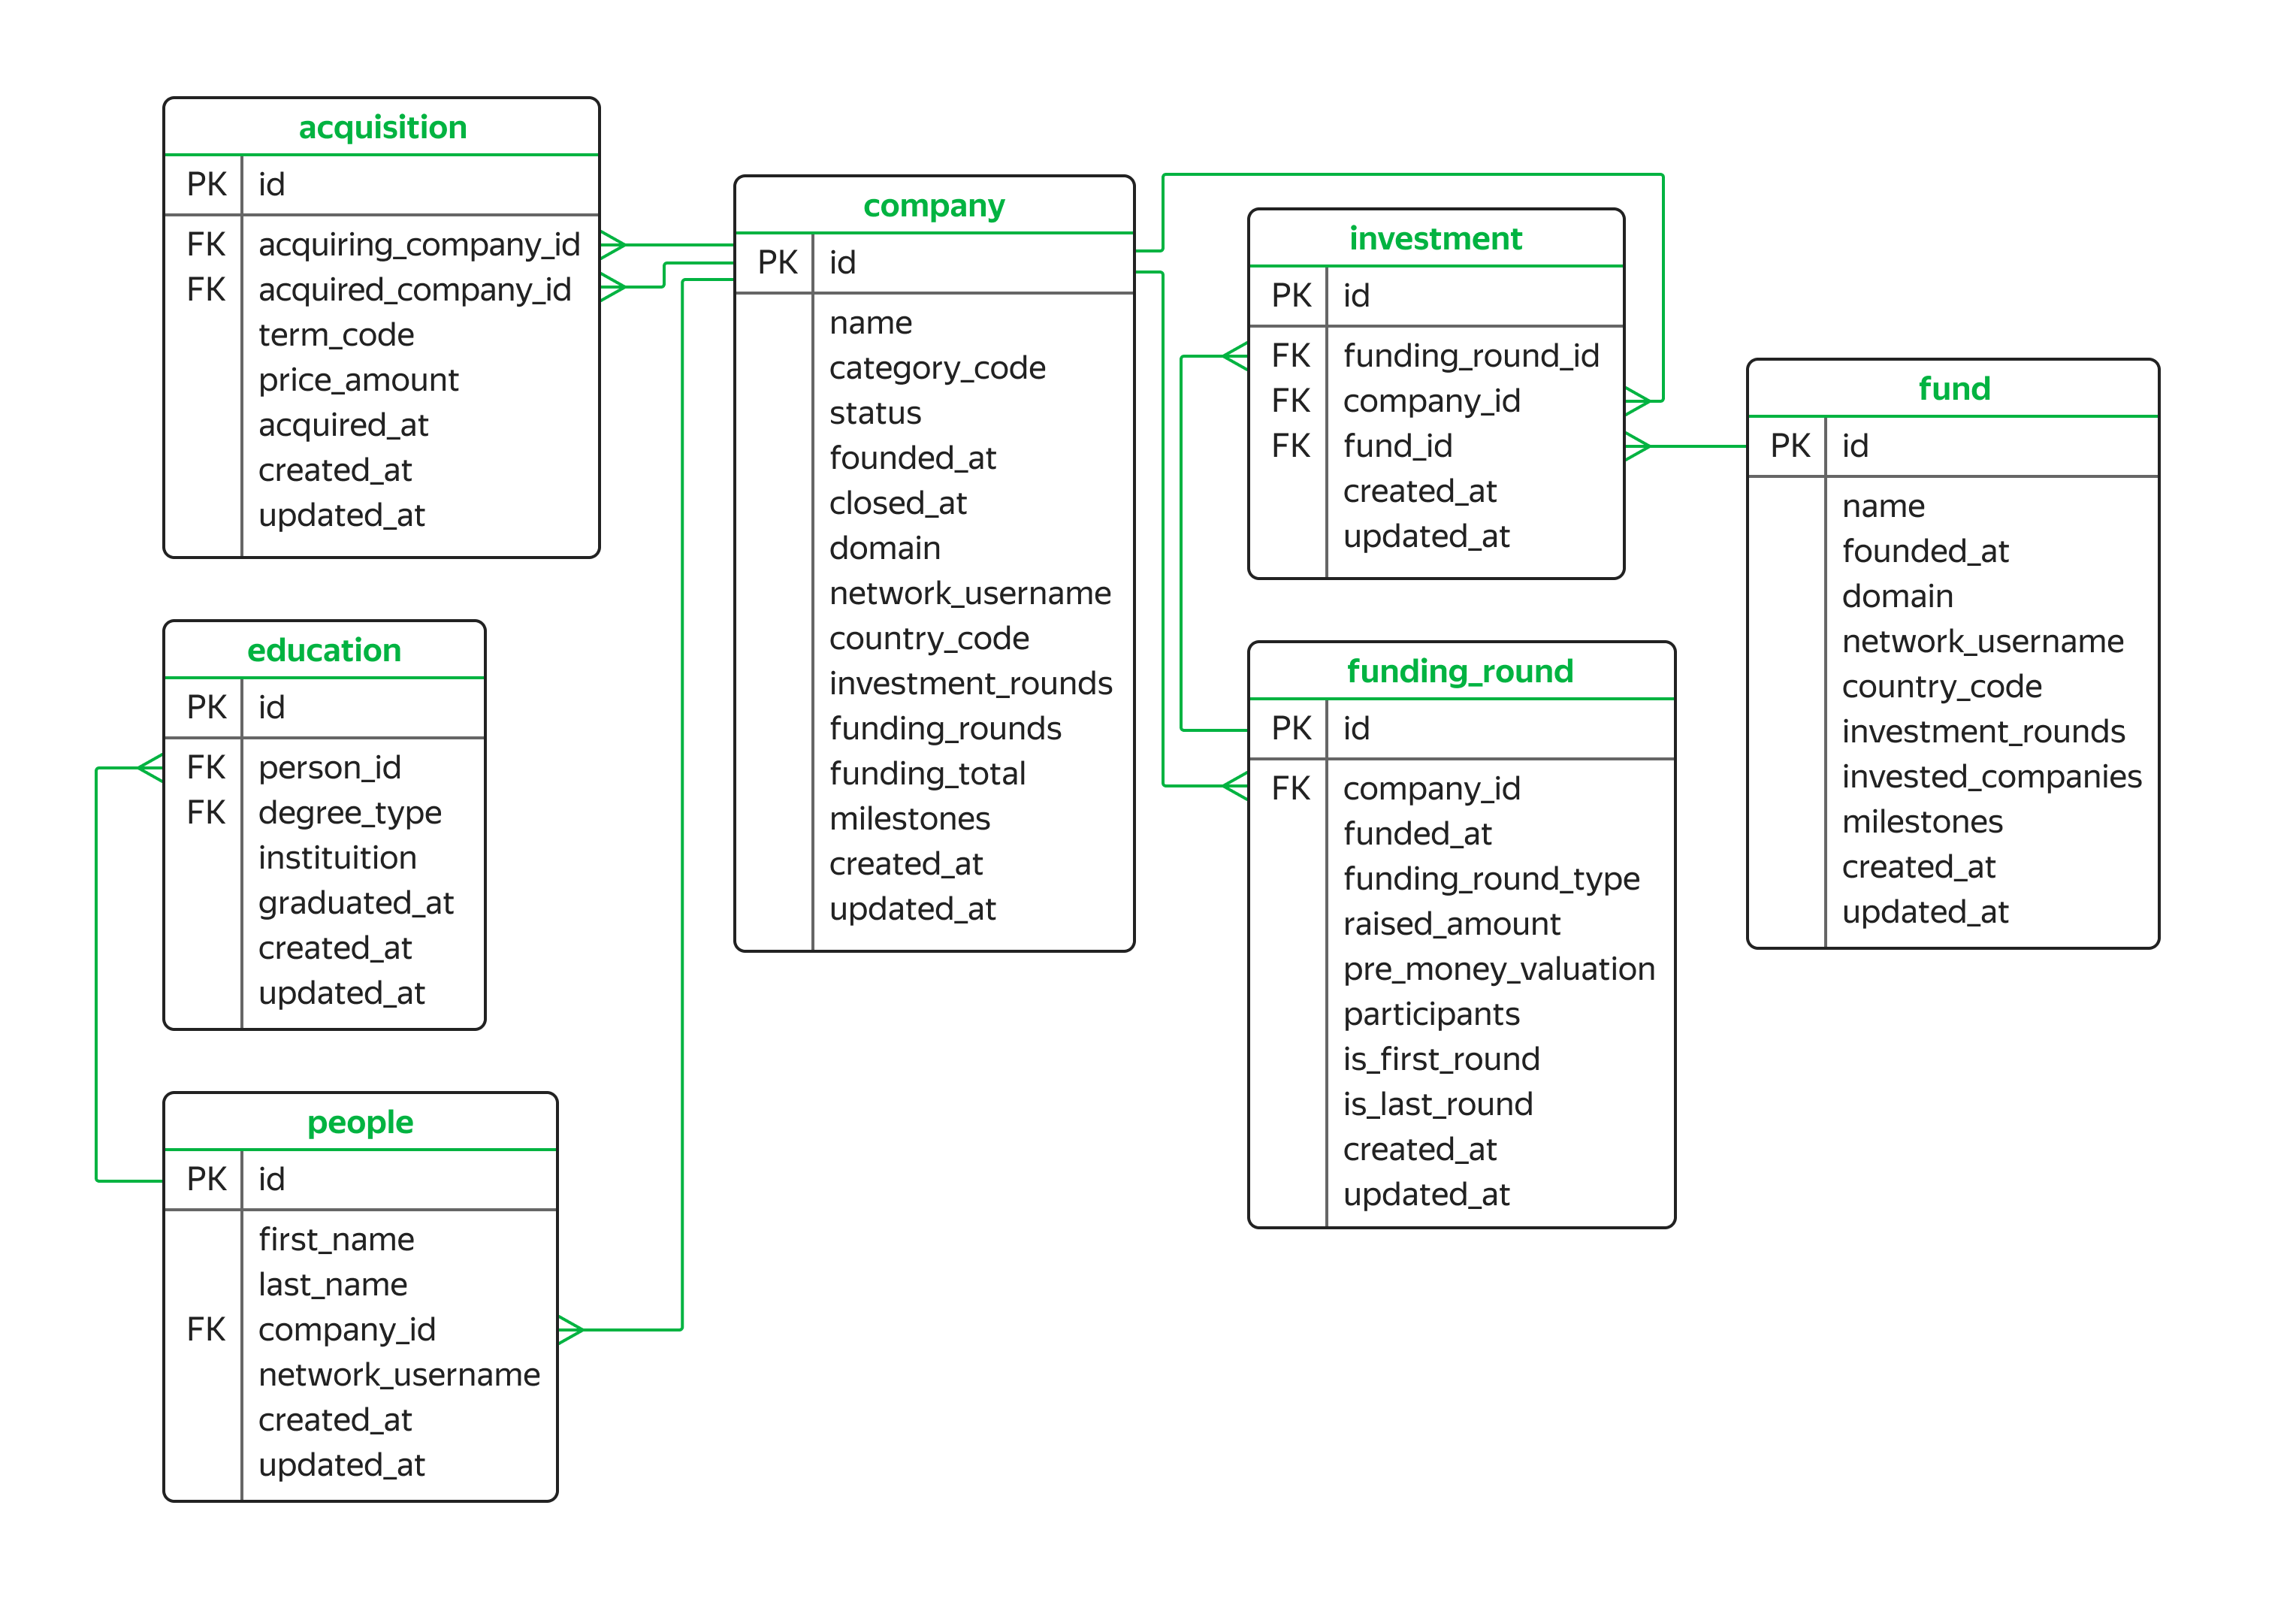

In [9]:
#@title
from IPython.display import Image
Image('ER_diagram.png')

## Задания

### Задание 1. Посчитайте, сколько компаний закрылось.

In [ ]:
'''
SELECT COUNT(id)
FROM company
WHERE status = 'closed';
'''

### Задание 2. Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы `company`. Отсортируйте таблицу по убыванию значений в поле `funding_total`.

In [ ]:
'''
SELECT funding_total
FROM company
WHERE country_code = 'USA'
      AND category_code = 'news'
ORDER BY funding_total DESC;
'''

### Задание 3. Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

In [ ]:
'''
SELECT SUM(price_amount)
FROM acquisition
WHERE term_code = 'cash'
      AND EXTRACT(YEAR FROM acquired_at) IN ('2011', '2012', '2013');
'''

### Задание 4. Отобразите имя, фамилию и названия аккаунтов людей в поле `network_username`, у которых названия аккаунтов начинаются на 'Silver'.

In [ ]:
'''
SELECT first_name,
       last_name,
       network_username
FROM people
WHERE network_username LIKE 'Silver%';
'''

### Задание 5. Выведите на экран всю информацию о людях, у которых названия аккаунтов в поле `network_username` содержат подстроку 'money', а фамилия начинается на 'K'.

In [ ]:
'''
SELECT *
FROM people
WHERE network_username LIKE '%money%'
      AND last_name LIKE 'K%';
'''

### Задание 6. Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

In [ ]:
'''
SELECT country_code,
       SUM(funding_total)
FROM company
GROUP BY country_code
ORDER BY SUM(funding_total) DESC;
'''

### Задание 7. Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату. Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
'''
SELECT funded_at,
       MIN(raised_amount),
       MAX(raised_amount)
FROM funding_round
GROUP BY funded_at
HAVING MIN(raised_amount) != 0
       AND MIN(raised_amount) != MAX(raised_amount);
'''

### Задание 8. Создайте поле с категориями:
- для фондов, которые инвестируют в 100 и более компаний, назначьте категорию 'high_activity';
- для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию 'middle_activity';
- если количество инвестируемых компаний фонда не достигает 20, назначьте категорию 'low_activity'.

Отобразите все поля таблицы `fund` и новое поле с категориями.

In [ ]:
'''
SELECT *,
        CASE
            WHEN invested_companies >= 100 THEN 'high_activity'
            WHEN invested_companies >= 20 AND invested_companies < 100 THEN 'middle_activity'
            WHEN invested_companies < 20 THEN 'low_activity'
        END
FROM fund;
'''

### Задание 9. Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

In [ ]:
'''
SELECT ROUND(AVG(investment_rounds)),
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity
FROM fund
GROUP BY activity
ORDER BY AVG(investment_rounds);
'''

### Задание 10. Проанализируйте, в каких странах находятся фонды, которые чаще всего инвестируют в стартапы. Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды этой страны, основанные с 2010 по 2012 год включительно. Исключите страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. Выгрузите десять самых активных стран-инвесторов: отсортируйте таблицу по среднему количеству компаний от большего к меньшему. Затем добавьте сортировку по коду страны в лексикографическом порядке.

In [ ]:
'''
SELECT country_code,
       MIN(invested_companies),
       MAX(invested_companies),
       AVG(invested_companies)
FROM fund
WHERE CAST(founded_at AS date) BETWEEN '2010-01-01' AND '2012-12-31'
GROUP BY country_code
HAVING MIN(invested_companies) > 0
ORDER BY AVG(invested_companies) DESC, country_code
LIMIT 10;
'''

### Задание 11. Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

In [ ]:
'''
SELECT pl.first_name,
       pl.last_name,
       ed.instituition
FROM people AS pl
LEFT JOIN education AS ed ON pl.id = ed.person_id;
'''

### Задание 12. Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

In [ ]:
'''
SELECT d.name,
       COUNT (DISTINCT b.institute) AS quantity
FROM
(SELECT pl.company_id AS comp_id,
       ed.instituition AS institute
FROM people AS pl
LEFT JOIN education AS ed ON pl.id = ed.person_id) AS b

INNER JOIN
(SELECT name, id
FROM company) AS d ON b.comp_id = d.id
GROUP BY d.name
ORDER BY quantity DESC
LIMIT 5;
'''

### Задание 13.Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

In [ ]:
'''
SELECT name
FROM company
WHERE id IN (SELECT company_id
             FROM funding_round
             WHERE is_first_round = 1
             AND is_last_round =1)
      AND status = 'closed';

'''

### Задание 14. Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [ ]:
'''
SELECT DISTINCT id
FROM people
WHERE company_id IN (SELECT id
                     FROM company
                     WHERE id IN (SELECT company_id
                                  FROM funding_round
                                  WHERE is_first_round = 1
                                  AND is_last_round =1)
                      AND status = 'closed');
'''

### Задание 15. Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

In [ ]:
'''
WITH i AS (SELECT DISTINCT id AS staff
           FROM people
           WHERE company_id IN (SELECT id
                                FROM company
                                WHERE id IN (SELECT company_id
                                             FROM funding_round
                                             WHERE is_first_round = 1
                                             AND is_last_round =1)
                                          AND status = 'closed'
                                            ) )
SELECT DISTINCT i.staff,
                ed.instituition
FROM i
INNER JOIN education AS ed ON i.staff = ed.person_id;
'''

### Задание 16. Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания. При подсчёте учитывайте, что некоторые сотрудники могли окончить одно и то же заведение дважды.

In [ ]:
'''
WITH i AS (SELECT DISTINCT id AS staff
           FROM people
           WHERE company_id IN (SELECT id
                                FROM company
                                WHERE id IN (SELECT company_id
                                             FROM funding_round
                                             WHERE is_first_round = 1
                                             AND is_last_round =1)
                                          AND status = 'closed'))
SELECT i.staff,
       COUNT(ed.instituition)
FROM i
INNER JOIN education AS ed ON i.staff = ed.person_id
GROUP BY i.staff;
'''

### Задание 17. Дополните предыдущий запрос и выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

In [ ]:
'''
WITH i AS (SELECT id AS staff
           FROM people
           WHERE company_id IN (SELECT id
                                FROM company
                                WHERE id IN (SELECT company_id
                                             FROM funding_round
                                             WHERE is_first_round = 1
                                             AND is_last_round =1)
                                          AND status = 'closed'
                                            ) ),
d AS (SELECT i.staff,
             COUNT(ed.instituition) AS quantity
FROM i
INNER JOIN education AS ed ON i.staff = ed.person_id
GROUP BY i.staff)

SELECT AVG(d.quantity)
FROM d;
'''

### Задание 18. Напишите похожий запрос: выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Facebook (сервис, запрещённый на территории РФ).

In [ ]:
'''
WITH i AS(SELECT person_id,
                 COUNT(instituition) AS quantity
          FROM education
          WHERE person_id IN (SELECT id
                              FROM people
                              WHERE company_id IN (SELECT id
                                                   FROM company
                                                   WHERE name = 'Facebook'))
GROUP BY person_id)

SELECT AVG(i.quantity)
FROM i;
'''

### Задание 19. Составьте таблицу из полей:
- `name_of_fund` — название фонда;
- `name_of_company` — название компании;
- `amount` — сумма инвестиций, которую привлекла компания в раунде.

В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
'''
SELECT f.name AS name_of_fund,
       comp.name AS name_of_company,
       fr.raised_amount AS amount
FROM company AS comp
INNER JOIN investment AS inv ON comp.id = inv.company_id
INNER JOIN fund AS f ON inv.fund_id = f.id
INNER JOIN funding_round AS fr ON inv.funding_round_id = fr.id
WHERE comp.milestones > 6
      AND CAST(DATE_TRUNC('year', fr.funded_at) AS date) BETWEEN '2012-01-01' AND '2013-12-31' ;
'''

### Задание 20. Выгрузите таблицу, в которой будут такие поля:
- название компании-покупателя;
- сумма сделки;
- название компании, которую купили;
- сумма инвестиций, вложенных в купленную компанию;
- доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.

Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы.
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничьте таблицу первыми десятью записями.

In [ ]:
'''
WITH i AS (
SELECT  acq.id AS id_1,
        acq.acquiring_company_id AS id_buyer,
        comp.name AS name_buyer,
       acq.price_amount AS amount
FROM acquisition AS acq
LEFT JOIN company AS comp ON acq.acquiring_company_id = comp.id
WHERE acq.price_amount > 0
),

b AS (
SELECT  acq.id AS id_2,
        acq.acquired_company_id AS id_product,
        comp.name AS name_product,
        acq.price_amount AS amount,
        comp.funding_total AS total
FROM acquisition AS acq
LEFT JOIN company AS comp ON acq.acquired_company_id = comp.id
WHERE acq.price_amount > 0
      AND comp.funding_total > 0)

SELECT DISTINCT
       i.name_buyer,
       i.amount,
       b.name_product,
       b.total,
       ROUND((i.amount/b.total))
FROM i
INNER JOIN b ON i.id_1 = b.id_2
WHERE i.amount > 0 AND b.total>0
ORDER BY  i.amount DESC, b.name_product
LIMIT 10;
'''

### Задание 21. Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверьте, что сумма инвестиций не равна нулю. Выведите также номер месяца, в котором проходил раунд финансирования.

In [ ]:
'''
SELECT comp.name,
       EXTRACT(MONTH FROM fr.funded_at)
FROM company AS comp
INNER JOIN funding_round AS fr ON comp.id = fr.company_id
WHERE category_code = 'social'
       AND EXTRACT(YEAR FROM fr.funded_at) IN ('2010', '2011', '2012', '2013')
       AND fr.raised_amount != 0;
'''

### Задание 22. Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:
- номер месяца, в котором проходили раунды;
- количество уникальных названий фондов из США, которые инвестировали в этом месяце;
- количество компаний, купленных за этот месяц;
- общая сумма сделок по покупкам в этом месяце.

In [ ]:
'''
WITH i AS
(SELECT EXTRACT (MONTH FROM fr.funded_at) AS month,
       COUNT(DISTINCT f.name) AS quantity_fund
FROM funding_round AS fr
INNER JOIN investment AS inv ON fr.id = inv.funding_round_id
INNER JOIN fund AS f ON inv. fund_id = f.id
WHERE EXTRACT (YEAR FROM fr.funded_at) IN ('2010', '2011', '2012', '2013')
        AND f.country_code = 'USA'
GROUP BY EXTRACT (MONTH FROM fr.funded_at)),

b AS (SELECT EXTRACT (MONTH FROM acq.acquired_at) AS month,
       COUNT (acq.acquired_company_id) AS product,
       SUM(acq.price_amount) AS amount
FROM acquisition AS acq
WHERE EXTRACT (YEAR FROM ACQ.acquired_at) IN ('2010', '2011', '2012', '2013')
GROUP BY EXTRACT (MONTH FROM acquired_at))

SELECT i.month,
       i.quantity_fund,
       b.product,
       b.amount
FROM i
LEFT JOIN b ON i.month = b.month;
'''

### Задание 23. Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
'''
WITH i AS (SELECT comp.country_code AS country,
       AVG(comp.funding_total) AS total_2011
FROM company AS comp
WHERE EXTRACT(YEAR FROM comp.founded_at) IN ('2011')
GROUP BY comp.country_code),

b AS (SELECT comp.country_code AS country,
       AVG(comp.funding_total) AS total_2012
FROM company AS comp
WHERE EXTRACT(YEAR FROM comp.founded_at) IN ('2012')
GROUP BY comp.country_code),

d AS (SELECT comp.country_code AS country,
       AVG(comp.funding_total) AS total_2013
FROM company AS comp
WHERE EXTRACT(YEAR FROM comp.founded_at) IN ('2013')
GROUP BY comp.country_code)

SELECT i.country,
       i.total_2011,
       b.total_2012,
       d.total_2013
FROM i
INNER JOIN b ON i.country = b.country
INNER JOIN d ON b.country = d.country
ORDER BY i.total_2011 DESC;
'''